**Before you start**<br>
Change runtime type to GPU <br>
Runtime > Change runtime type > GPU > Save

Install fastai

In [3]:
!pip install -Uqq fastbook
from fastai.vision.all import *
from IPython.display import Image 

Downlaod data set<br>
[Other data sets](https://docs.fast.ai/data.external.html)

In [4]:
path = untar_data(URLs.IMAGEWOOF)/'train'
path

Path('/root/.fastai/data/imagewoof2/train')

In [5]:
URLs.IMAGEWOOF

'https://s3.amazonaws.com/fast-ai-imageclas/imagewoof2.tgz'

In [6]:
path.ls()

(#12) [Path('/root/.fastai/data/imagewoof2/train/Shih-Tzu'),Path('/root/.fastai/data/imagewoof2/train/English_foxhound'),Path('/root/.fastai/data/imagewoof2/train/Australian_terrier'),Path('/root/.fastai/data/imagewoof2/train/models'),Path('/root/.fastai/data/imagewoof2/train/classes.csv'),Path('/root/.fastai/data/imagewoof2/train/Border_terrier'),Path('/root/.fastai/data/imagewoof2/train/Rhodesian_ridgeback'),Path('/root/.fastai/data/imagewoof2/train/Samoyed'),Path('/root/.fastai/data/imagewoof2/train/Golden_retriever'),Path('/root/.fastai/data/imagewoof2/train/Dingo')...]

In [7]:
label_remap_dict = {'n02086240':'Shih-Tzu',
                'n02087394':'Rhodesian_ridgeback',
                'n02088364':'beagle',
                'n02089973':'English_foxhound',
                'n02093754':'Border_terrier',
                'n02096294':'Australian_terrier',
                'n02099601':'Golden_retriever',
                'n02105641':'Old_English_sheepdog',
                'n02111889':'Samoyed',
                'n02115641':'Dingo'}

In [17]:
for folder in path.glob('n02*'):
    class_name = label_remap_dict[folder.name]
    folder.rename(path/class_name)

In [18]:
path.ls()

(#10) [Path('/root/.fastai/data/imagewoof2/train/Shih-Tzu'),Path('/root/.fastai/data/imagewoof2/train/English_foxhound'),Path('/root/.fastai/data/imagewoof2/train/Australian_terrier'),Path('/root/.fastai/data/imagewoof2/train/Border_terrier'),Path('/root/.fastai/data/imagewoof2/train/Rhodesian_ridgeback'),Path('/root/.fastai/data/imagewoof2/train/Samoyed'),Path('/root/.fastai/data/imagewoof2/train/Golden_retriever'),Path('/root/.fastai/data/imagewoof2/train/Dingo'),Path('/root/.fastai/data/imagewoof2/train/Old_English_sheepdog'),Path('/root/.fastai/data/imagewoof2/train/beagle')]

In [19]:
batch_size = 30
img_size = 320

In [20]:
item_tfms = [Resize(img_size)]
batch_tfms = [Normalize.from_stats(*imagenet_stats),
            *aug_transforms(size=img_size)]

In [21]:
data = ImageDataLoaders.from_folder(path, train=".", valid_pct=0.2,splitter=RandomSplitter(seed=42),
                                    bs=batch_size,
                                    item_tfms=item_tfms,
                                    batch_tfms=batch_tfms
                                   )


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  /pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


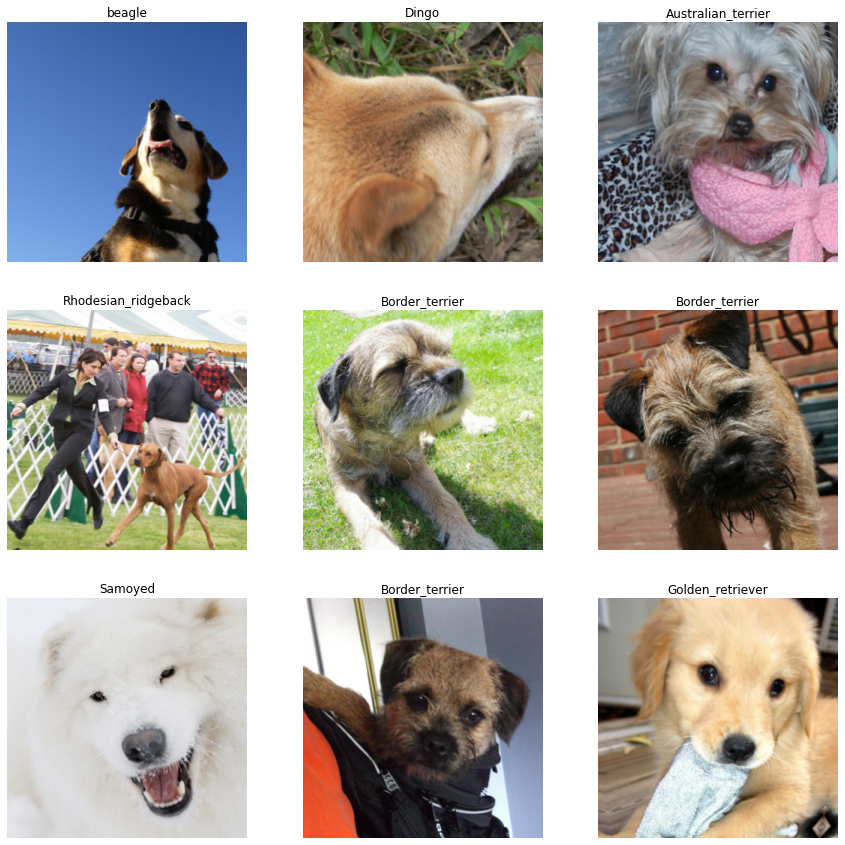

In [22]:
data.show_batch(max_n = 9, figsize = (15,15))


In [23]:
np.savetxt(path/'classes.csv', np.array(data.vocab), fmt='%s')


In [25]:
learn = cnn_learner(data, resnet18, metrics=error_rate)


epoch,train_loss,valid_loss,error_rate,time
0,0.496723,0.294580,0.081994,01:54


Better model found at epoch 0 with error_rate value: 0.0819944515824318.


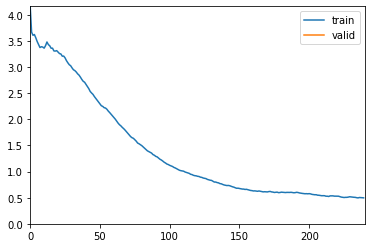

epoch,train_loss,valid_loss,error_rate,time
0,0.364770,0.280643,0.073684,02:11
1,0.288034,0.228540,0.062604,02:11
2,0.175163,0.195409,0.051524,02:11


Better model found at epoch 0 with error_rate value: 0.0736841931939125.


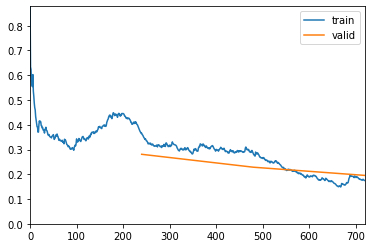

Better model found at epoch 1 with error_rate value: 0.06260386854410172.
Better model found at epoch 2 with error_rate value: 0.05152352899312973.


In [26]:
learn.fine_tune(3,cbs = [ShowGraphCallback(),
                         SaveModelCallback(monitor='error_rate',with_opt=True, fname='quick_model')])


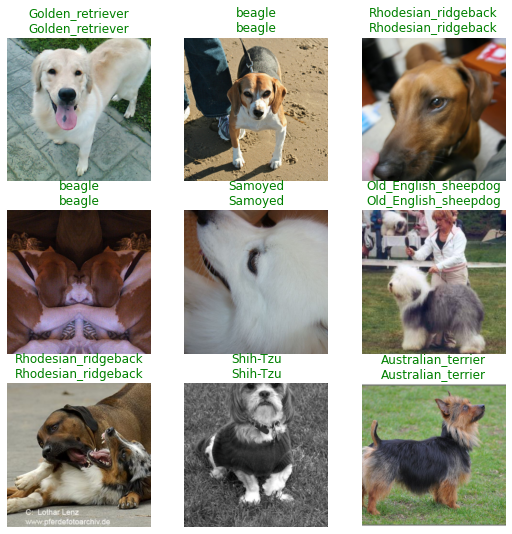

In [28]:
learn.show_results()

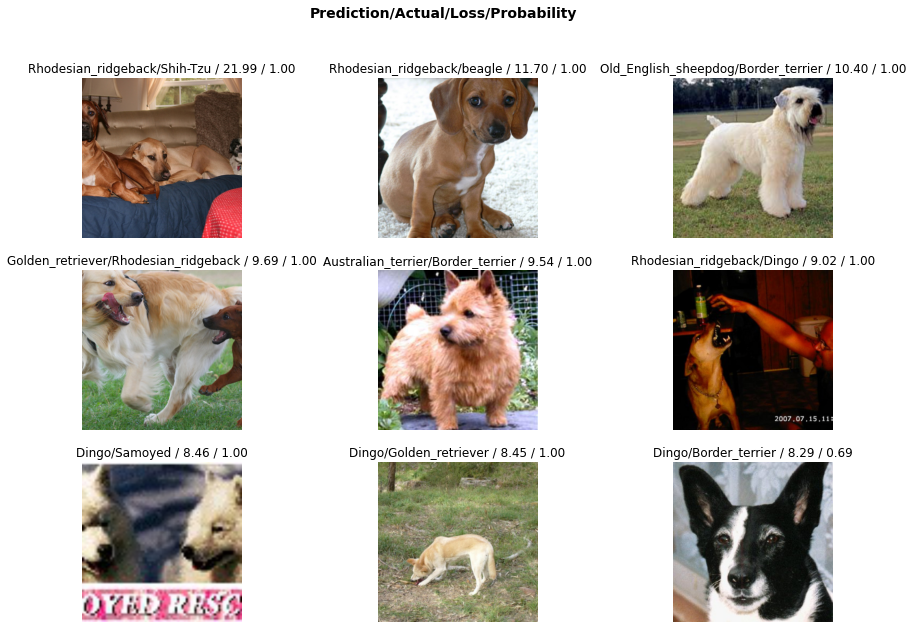

In [29]:
interp = Interpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(15,10))

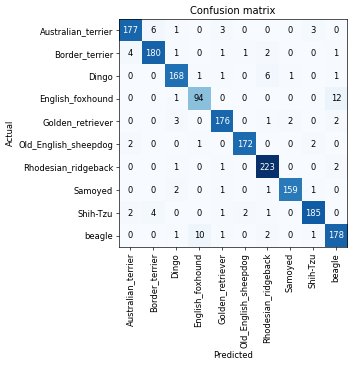

In [30]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(6,6), dpi=60)

In [31]:
test_img_url = 'https://upload.wikimedia.org/wikipedia/commons/5/55/Beagle_600.jpg'

In [32]:
file_name = os.path.basename(test_img_url)
file_name

'Beagle_600.jpg'

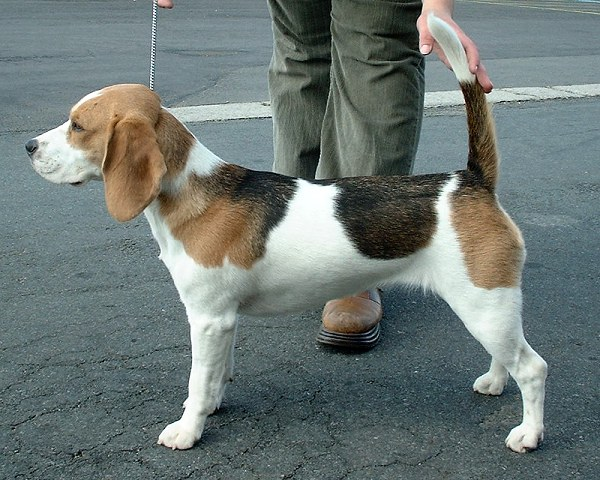

In [35]:
import requests

img_data = requests.get(test_img_url).content
with open(file_name, 'wb') as handler:
    handler.write(img_data)
Image(file_name)

In [36]:
learn.predict(file_name)

('beagle',
 tensor(9),
 tensor([9.0932e-08, 9.5847e-07, 7.6552e-07, 2.4189e-03, 9.0100e-06, 2.5170e-06,
         1.4427e-06, 8.2976e-07, 8.6067e-06, 9.9756e-01]))